In [ ]:
import csv
import pandas as pd
import os
import time
import numpy as np
from google.colab import files
from google.colab import drive
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import requests
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Customer Data**

In [ ]:
kh=pd.read_excel("/content/drive/MyDrive/Duan_banhmy/raw_data_full.xlsx", "customers")
kh.head()

,Ma_KH,SDT,Ten_KH,Dia_chi,Ngay_Sinh
0,12346,9782009905,Pham Tuan,Ho Tung Mau,1987-06-16
1,12347,8856513806,Dang Quoc,Bui Thi Xuan,1999-01-20
2,12348,9941519848,Le Hanh,Dinh Tien Hoang,1992-07-04
3,12349,8650804761,Tran Tri,Le Loi,1977-09-13
4,12350,6401916017,Dang Nhu,Dinh Tien Hoang,1997-06-28


In [ ]:
kh.dtypes

,0
Ma_KH,int64
SDT,int64
Ten_KH,object
Dia_chi,object
Ngay_Sinh,datetime64[ns]


In [ ]:
kh.isnull().sum()

,0
Ma_KH,0
SDT,0
Ten_KH,0
Dia_chi,0
Ngay_Sinh,0


In [ ]:
kh.duplicated().sum()

0

# **Product Data**

In [ ]:
sp=pd.read_excel("/content/drive/MyDrive/Duan_banhmy/raw_data_full.xlsx", "products")
sp.head()

,Ma_SP,Ten_SP,Gia_ban
0,4920,Bánh gato vani,42000
1,7963,Bánh mì bơ,24000
2,9011,Bánh mì phô mai,30000
3,9613,Bánh bông lan trứng muối,55000
4,4003,Bánh gạo lứt,25000


In [ ]:
sp.dtypes

,0
Ma_SP,int64
Ten_SP,object
Gia_ban,int64


In [ ]:
sp.isnull().sum()

,0
Ma_SP,0
Ten_SP,0
Gia_ban,0


In [ ]:
sp.duplicated().sum()

0

# **Transaction Data**

In [ ]:
gd=pd.read_excel("/content/drive/MyDrive/Duan_banhmy/raw_data_full.xlsx", "transactions")
gd.head()

,Ma_hoa_don,Ma_KH,Ngay_mua_hang,Ma_SP,So_Luong
0,539993,13313,2023-01-04 10:00:00,2157,1
1,539993,13313,2023-01-04 10:00:00,4920,4
2,539993,13313,2023-01-04 10:00:00,8322,5
3,539993,13313,2023-01-04 10:00:00,7149,3
4,539993,13313,2023-01-04 10:00:00,3529,4


In [ ]:
gd.dtypes

,0
Ma_hoa_don,object
Ma_KH,int64
Ngay_mua_hang,datetime64[ns]
Ma_SP,int64
So_Luong,int64


In [ ]:
gd.isnull().sum()

,0
Ma_hoa_don,0
Ma_KH,0
Ngay_mua_hang,0
Ma_SP,0
So_Luong,0


In [ ]:
gd.duplicated().sum()

0

In [ ]:
data=kh.merge(gd, how='inner', left_on='Ma_KH', right_on='Ma_KH')
data=data.merge(sp, how='inner', left_on='Ma_SP', right_on='Ma_SP')
data.head()

,Ma_KH,SDT,Ten_KH,Dia_chi,Ngay_Sinh,Ma_hoa_don,Ngay_mua_hang,Ma_SP,So_Luong,Ten_SP,Gia_ban
0,12346,9782009905,Pham Tuan,Ho Tung Mau,1987-06-16,541431,2023-01-18 10:01:00,8322,2,Bánh bông lan,32000
1,12346,9782009905,Pham Tuan,Ho Tung Mau,1987-06-16,C541433,2023-01-18 10:17:00,8322,4,Bánh bông lan,32000
2,12347,8856513806,Dang Quoc,Bui Thi Xuan,1999-01-20,542237,2023-01-26 14:30:00,7963,2,Bánh mì bơ,24000
3,12347,8856513806,Dang Quoc,Bui Thi Xuan,1999-01-20,542237,2023-01-26 14:30:00,9011,5,Bánh mì phô mai,30000
4,12347,8856513806,Dang Quoc,Bui Thi Xuan,1999-01-20,542237,2023-01-26 14:30:00,8322,5,Bánh bông lan,32000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152112 entries, 0 to 152111
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ma_KH          152112 non-null  int64         
 1   SDT            152112 non-null  int64         
 2   Ten_KH         152112 non-null  object        
 3   Dia_chi        152112 non-null  object        
 4   Ngay_Sinh      152112 non-null  datetime64[ns]
 5   Ma_hoa_don     152112 non-null  object        
 6   Ngay_mua_hang  152112 non-null  datetime64[ns]
 7   Ma_SP          152112 non-null  int64         
 8   So_Luong       152112 non-null  int64         
 9   Ten_SP         152112 non-null  object        
 10  Gia_ban        152112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.8+ MB


In [ ]:
current_date = datetime.now()
data['age'] = data['Ngay_Sinh'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))
data['year'] = data['Ngay_mua_hang'].dt.year
data['month'] = data['Ngay_mua_hang'].dt.month
data['day'] = data['Ngay_mua_hang'].dt.day
data['hour'] = data['Ngay_mua_hang'].dt.hour
data['thu_trong_tuan'] = data['Ngay_mua_hang'].dt.dayofweek + 2
data['Doanh_thu']= data['So_Luong'] * data['Gia_ban']
data=data.drop(['Ngay_Sinh'], axis=1)
data=data.drop(['SDT', 'Ten_KH'], axis=1)
data.head()

,Ma_KH,Dia_chi,Ma_hoa_don,Ngay_mua_hang,Ma_SP,So_Luong,Ten_SP,Gia_ban,age,year,month,day,hour,thu_trong_tuan,Doanh_thu
0,12346,Ho Tung Mau,541431,2023-01-18 10:01:00,8322,2,Bánh bông lan,32000,37,2023,1,18,10,4,64000
1,12346,Ho Tung Mau,C541433,2023-01-18 10:17:00,8322,4,Bánh bông lan,32000,37,2023,1,18,10,4,128000
2,12347,Bui Thi Xuan,542237,2023-01-26 14:30:00,7963,2,Bánh mì bơ,24000,25,2023,1,26,14,5,48000
3,12347,Bui Thi Xuan,542237,2023-01-26 14:30:00,9011,5,Bánh mì phô mai,30000,25,2023,1,26,14,5,150000
4,12347,Bui Thi Xuan,542237,2023-01-26 14:30:00,8322,5,Bánh bông lan,32000,25,2023,1,26,14,5,160000


In [ ]:
headers = {
    'User-Agent': 'Capstone2/1.0 (nam.studyjob@gmail.com)'  # Đặt tên ứng dụng và email của bạn
}
def get_coordinates(street_name, city="Da Nang"):
    # URL API Nominatim
    url = f"https://nominatim.openstreetmap.org/search?street={street_name}&city={city}&format=json"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            return float(data[0]['lat']), float(data[0]['lon'])
    return None, None
# Ví dụ danh sách đường phố
streets = data['Dia_chi'].unique()
coordinates = {}
coordinate_data = []
for street in streets:
  lat, lon = get_coordinates(f'Đường {street}')
  coordinates[street] = (lat, lon)
  coordinate_data.append({'city1': street,'city': street +', Da Nang', 'lat': lat, 'lon': lon})
  time.sleep(1.5)  # Thêm delay giữa các request
# Tạo DataFrame Coordinates
df_coordinates = pd.DataFrame(coordinate_data)
# In kết quả
data=data.merge(df_coordinates, how='inner', left_on='Dia_chi', right_on='city1')
data=data.drop(['city1','city'], axis=1)


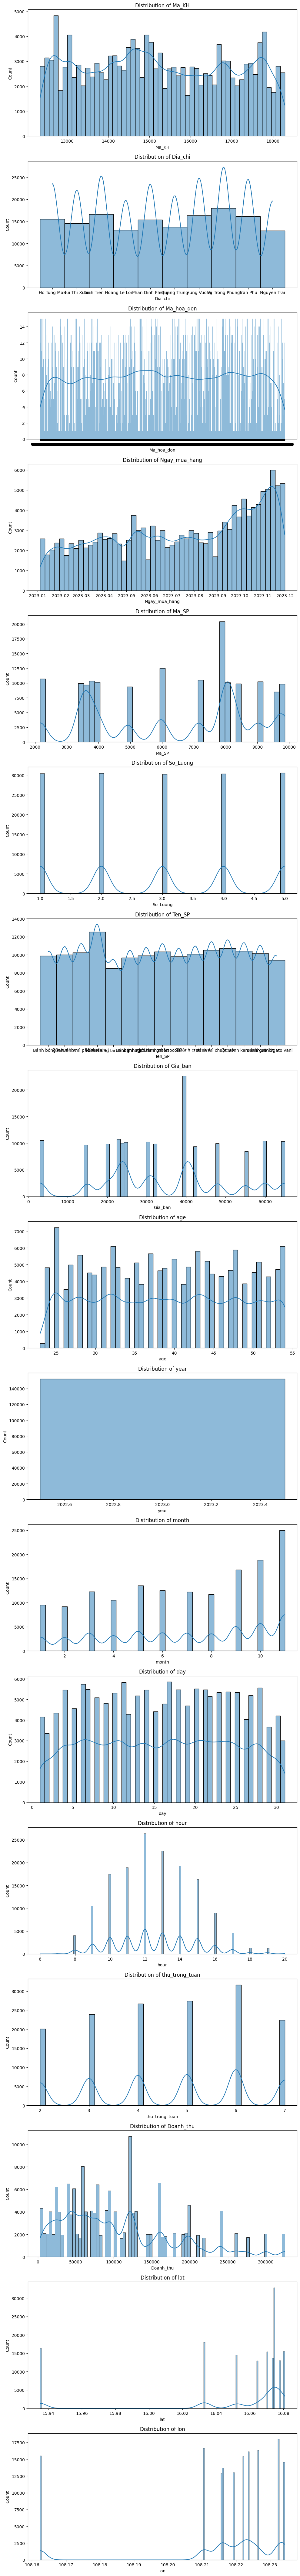

In [ ]:
def plot_column_distributions(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

    # Nếu chỉ có 1 cột, xử lý đặc biệt
    if num_columns == 1:
        column = df.columns[0]
        sns.histplot(df[column], kde=True, ax=axes)
        axes.set_title(f"Distribution of {column}")
    else:
        for i, column in enumerate(df.columns):
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f"Distribution of {column}")

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_column_distributions(data)

**Comments:**
- The columns have very good data representation. But, here we need to check the data of 3 columns: Ten_SP, Dia_chi and Ma_hoa_don

In [ ]:
columns = ['Ten_SP', 'Dia_chi','Ma_hoa_don']
for i in columns:
  print(data[i].unique())

['Bánh bông lan' 'Bánh mì bơ' 'Bánh mì phô mai' 'Bánh donut'
 'Bánh bông lan trứng muối' 'Bánh mì ngọt' 'Bánh ngói hạnh nhân'
 'Bánh gato socola' 'Sữa' 'Bánh croissant' 'Bánh mì chuột' 'Cacao'
 'Bánh kem lạnh' 'Bánh gạo lứt' 'Bánh gato vani']
['Ho Tung Mau' 'Bui Thi Xuan' 'Dinh Tien Hoang' 'Le Loi' 'Phan Dinh Phung'
 'Quang Trung' 'Hung Vuong' 'Vu Trong Phung' 'Tran Phu' 'Nguyen Trai']
['541431' 'C541433' '542237' ... '554065' '570715' '573167']


In [ ]:
data['Ma_hoa_don'] = data['Ma_hoa_don'].str.extract('(\d+)', expand=False)
data

,Ma_KH,Dia_chi,Ma_hoa_don,Ngay_mua_hang,Ma_SP,So_Luong,Ten_SP,Gia_ban,age,year,month,day,hour,thu_trong_tuan,Doanh_thu,lat,lon
0,12346,Ho Tung Mau,541431,2023-01-18 10:01:00,8322,2,Bánh bông lan,32000,37,2023,1,18,10,4,64000,16.080826,108.162400
1,12346,Ho Tung Mau,541433,2023-01-18 10:17:00,8322,4,Bánh bông lan,32000,37,2023,1,18,10,4,128000,16.080826,108.162400
2,12347,Bui Thi Xuan,542237,2023-01-26 14:30:00,7963,2,Bánh mì bơ,24000,25,2023,1,26,14,5,48000,16.052522,108.234361
3,12347,Bui Thi Xuan,542237,2023-01-26 14:30:00,9011,5,Bánh mì phô mai,30000,25,2023,1,26,14,5,150000,16.052522,108.234361
4,12347,Bui Thi Xuan,542237,2023-01-26 14:30:00,8322,5,Bánh bông lan,32000,25,2023,1,26,14,5,160000,16.052522,108.234361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152107,18287,Ho Tung Mau,570715,2023-10-12 10:23:00,7972,4,Bánh kem lạnh,60000,47,2023,10,12,10,5,240000,16.080826,108.162400
152108,18287,Ho Tung Mau,570715,2023-10-12 10:23:00,4920,2,Bánh gato vani,42000,47,2023,10,12,10,5,84000,16.080826,108.162400
152109,18287,Ho Tung Mau,570715,2023-10-12 10:23:00,7963,1,Bánh mì bơ,24000,47,2023,10,12,10,5,24000,16.080826,108.162400
152110,18287,Ho Tung Mau,573167,2023-10-28 09:29:00,9860,1,Sữa,20000,47,2023,10,28,9,7,20000,16.080826,108.162400


In [ ]:
data.describe()

,Ma_KH,Ngay_mua_hang,Ma_SP,So_Luong,Gia_ban,age,year,month,day,hour,thu_trong_tuan,Doanh_thu,lat,lon
count,152112.000000,152112,152112.000000,152112.000000,152112.000000,152112.000000,152112.0,152112.000000,152112.000000,152112.000000,152112.000000,152112.000000,152112.000000,152112.000000
mean,15242.374126,2023-07-12 19:27:30.866598400,6333.292850,3.001144,34670.499369,38.857454,2023.0,6.857158,15.895846,12.561100,4.616966,104153.189755,16.052261,108.216510
min,12346.000000,2023-01-04 10:00:00,2157.000000,1.000000,3000.000000,23.000000,2023.0,1.000000,1.000000,6.000000,2.000000,3000.000000,15.935162,108.162400
25%,13791.000000,2023-04-18 13:22:00,3703.000000,2.000000,23000.000000,31.000000,2023.0,4.000000,8.000000,11.000000,3.000000,46000.000000,16.052522,108.215719
50%,15114.000000,2023-07-22 10:23:00,7149.000000,3.000000,32000.000000,39.000000,2023.0,7.000000,16.000000,12.000000,5.000000,90000.000000,16.070408,108.222280
75%,16746.000000,2023-10-10 14:38:00,8322.000000,4.000000,48000.000000,47.000000,2023.0,10.000000,23.000000,14.000000,6.000000,150000.000000,16.074822,108.226416
max,18287.000000,2023-11-30 17:42:00,9860.000000,5.000000,65000.000000,54.000000,2023.0,11.000000,31.000000,20.000000,7.000000,325000.000000,16.080826,108.234361
std,1718.767243,NaN,2446.745058,1.415431,16786.143862,9.066717,0.0,3.218559,8.577094,2.347771,1.625346,74227.176387,0.043050,0.019579


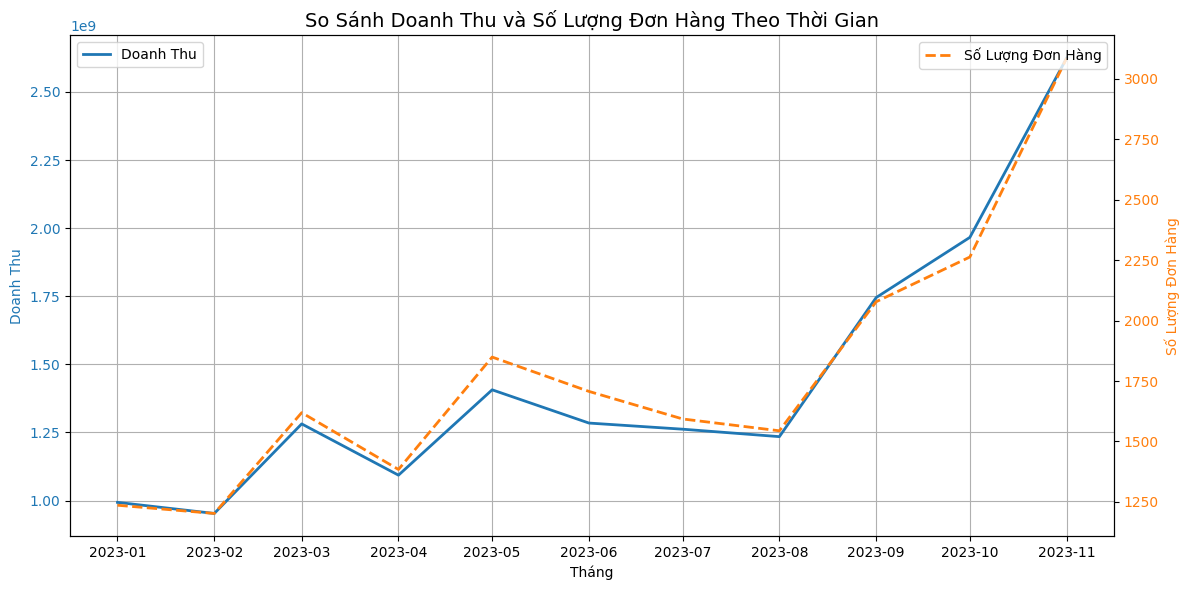

In [ ]:
import matplotlib.pyplot as plt

# Tạo cột 'year_month' từ 'Ngay_mua_hang'
data['year_month'] = data['Ngay_mua_hang'].dt.to_period('M')

# Tính tổng doanh thu theo tháng
grouped_revenue = data.groupby('year_month')['Doanh_thu'].sum().reset_index()

# Tính số lượng đơn hàng theo tháng (không trùng 'Ma_hoa_don')
grouped_orders = data.groupby('year_month')['Ma_hoa_don'].nunique().reset_index()

# Chuyển cột 'year_month' thành dạng timestamp để dễ vẽ
grouped_revenue['year_month'] = grouped_revenue['year_month'].dt.to_timestamp()
grouped_orders['year_month'] = grouped_orders['year_month'].dt.to_timestamp()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ doanh thu (Doanh thu theo tháng)
color = 'tab:blue'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh Thu', color=color)
ax1.plot(grouped_revenue['year_month'], grouped_revenue['Doanh_thu'], label='Doanh Thu', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid()

# Vẽ biểu đồ số lượng đơn hàng trên trục Y thứ hai
ax2 = ax1.twinx()  # Khởi tạo trục Y thứ hai
color = 'tab:orange'
ax2.set_ylabel('Số Lượng Đơn Hàng', color=color)
ax2.plot(grouped_orders['year_month'], grouped_orders['Ma_hoa_don'], label='Số Lượng Đơn Hàng', color=color, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Thêm tiêu đề và căn chỉnh layout
plt.title('So Sánh Doanh Thu và Số Lượng Đơn Hàng Theo Thời Gian', fontsize=14)
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Comments:**
- The chart shows a clear trend of revenue growth
- Revenue growth in the early and mid-year months is not strong
- Starting from August to the last months of the year, revenue increases significantly, maybe this is the transition period from warm to cold weather, so people tend to snack and eat more fast food.

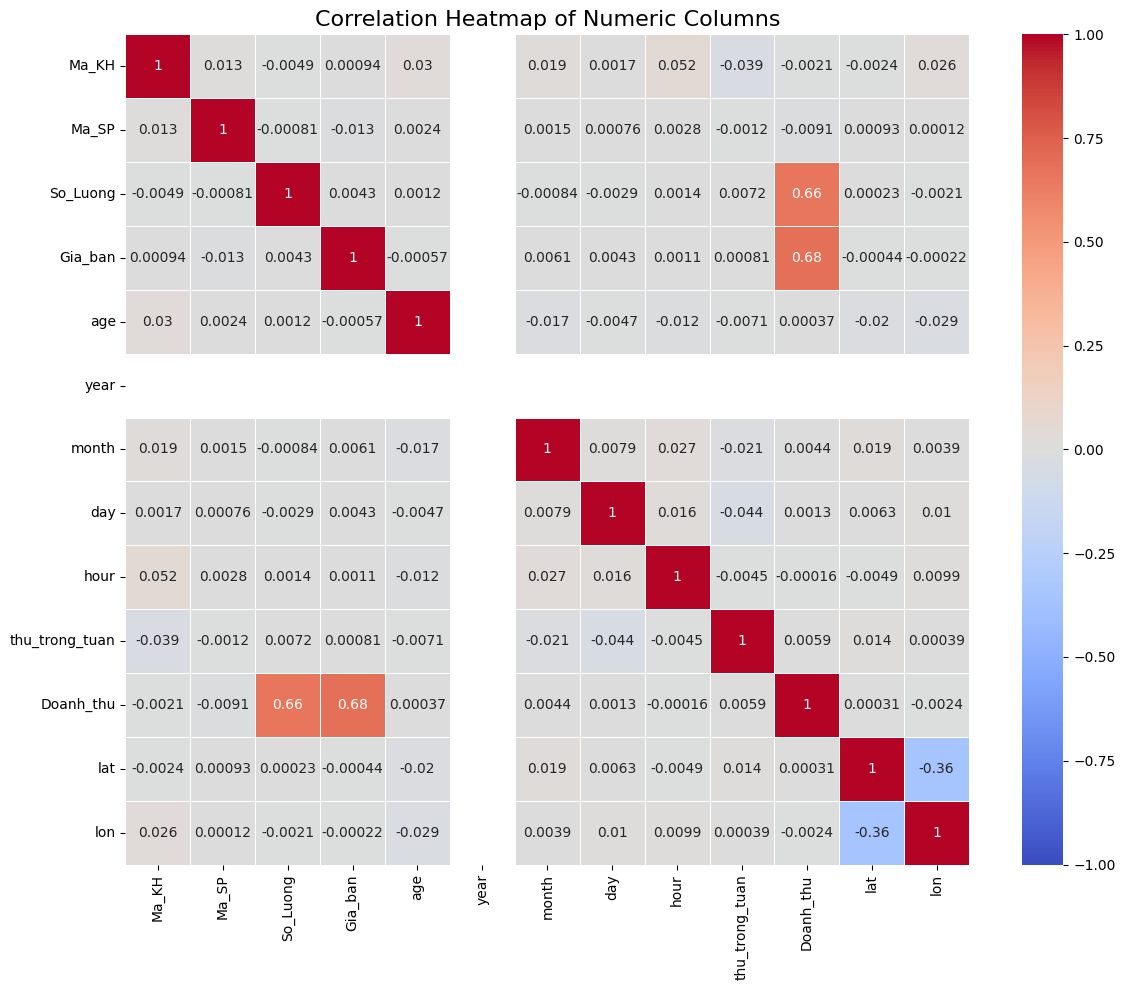

In [ ]:
# Kiểm tra xem trong dữ liệu có cột số không
numeric_columns = data.select_dtypes(include=['number']).columns

if len(numeric_columns) > 1:
    # Compute correlation matrix cho các cột số
    correlation_matrix = data[numeric_columns].corr()

    # Vẽ heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        linewidths=0.5,
        vmin=-1,  # Đặt phạm vi giá trị tương quan (-1 đến 1)
        vmax=1,
        center=0  # Trung tâm là giá trị 0
    )
    plt.title('Correlation Heatmap of Numeric Columns', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("Không đủ dữ liệu số để tính toán ma trận tương quan.")


**Comments:**
- There are 2 variables that strongly affect revenue: So_luong and Gia_ban

**Store revenue has a good growth trend but needs to be more aware of the 2 middle periods of the beginning and the end of the year**

In [ ]:
# Chọn 2 dữ liệu để phân tích giữa đầu năm và giữa cuối năm
df_17 = data[(data['month'] >= 1) & (data['month'] <= 7)]
df_8= data[(data['month'] >= 8) & (data['month'] <= 12)]

# **Phân tích kết quả doanh thu theo giời gian của nửa năm đầu và giữa cuối năm**

<ipython-input-137-46b76295f4c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17['year_month'] = df_17['Ngay_mua_hang'].dt.to_period('M')


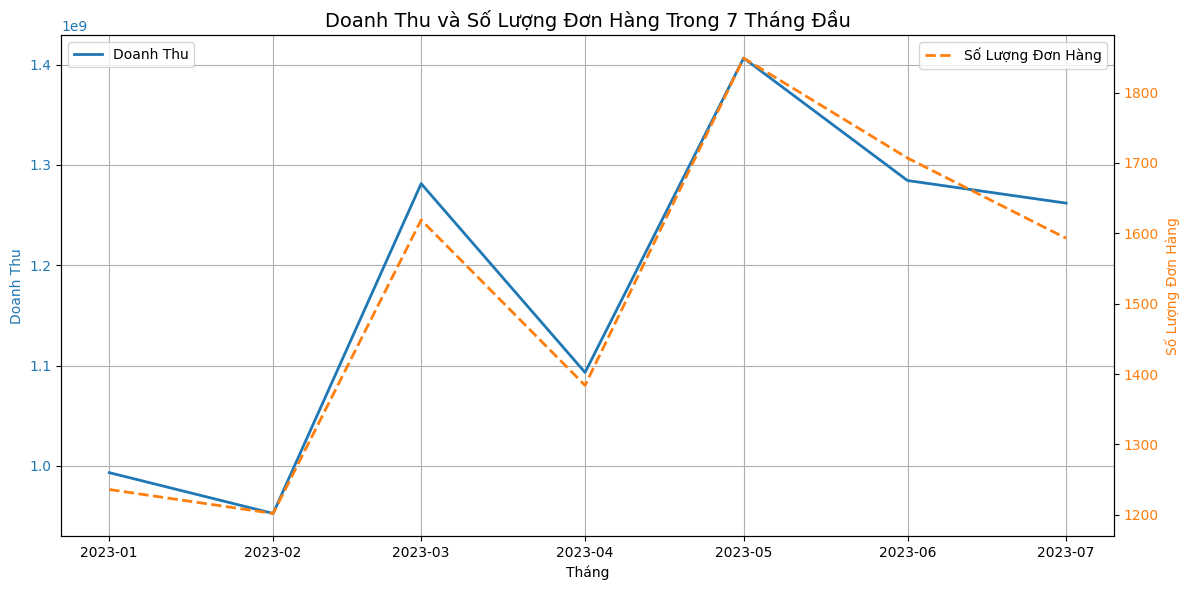

In [ ]:
# Tạo cột 'year_month' từ 'Ngay_mua_hang'
df_17['year_month'] = df_17['Ngay_mua_hang'].dt.to_period('M')

# Tính tổng doanh thu theo tháng
grouped_revenue = df_17.groupby('year_month')['Doanh_thu'].sum().reset_index()

# Tính số lượng đơn hàng theo tháng (không trùng 'Ma_hoa_don')
grouped_orders = df_17.groupby('year_month')['Ma_hoa_don'].nunique().reset_index()

# Chuyển cột 'year_month' thành dạng timestamp để dễ vẽ
grouped_revenue['year_month'] = grouped_revenue['year_month'].dt.to_timestamp()
grouped_orders['year_month'] = grouped_orders['year_month'].dt.to_timestamp()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ doanh thu (Doanh thu theo tháng)
color = 'tab:blue'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh Thu', color=color)
ax1.plot(grouped_revenue['year_month'], grouped_revenue['Doanh_thu'], label='Doanh Thu', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid()

# Vẽ biểu đồ số lượng đơn hàng trên trục Y thứ hai
ax2 = ax1.twinx()  # Khởi tạo trục Y thứ hai
color = 'tab:orange'
ax2.set_ylabel('Số Lượng Đơn Hàng', color=color)
ax2.plot(grouped_orders['year_month'], grouped_orders['Ma_hoa_don'], label='Số Lượng Đơn Hàng', color=color, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Thêm tiêu đề và căn chỉnh layout
plt.title('Doanh Thu và Số Lượng Đơn Hàng Trong 7 Tháng Đầu', fontsize=14)
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Comments:**
- Over time, revenue and number of orders tend to increase in the first 7 months
- There is a cycle where revenue decreases and increases alternately every month, in months 1, 3, 5, 7 revenue and number of orders increase, and in months 2, 4, 6 revenue and number of orders decrease

<ipython-input-138-d6f80128d4ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['year_month'] = df_8['Ngay_mua_hang'].dt.to_period('M')


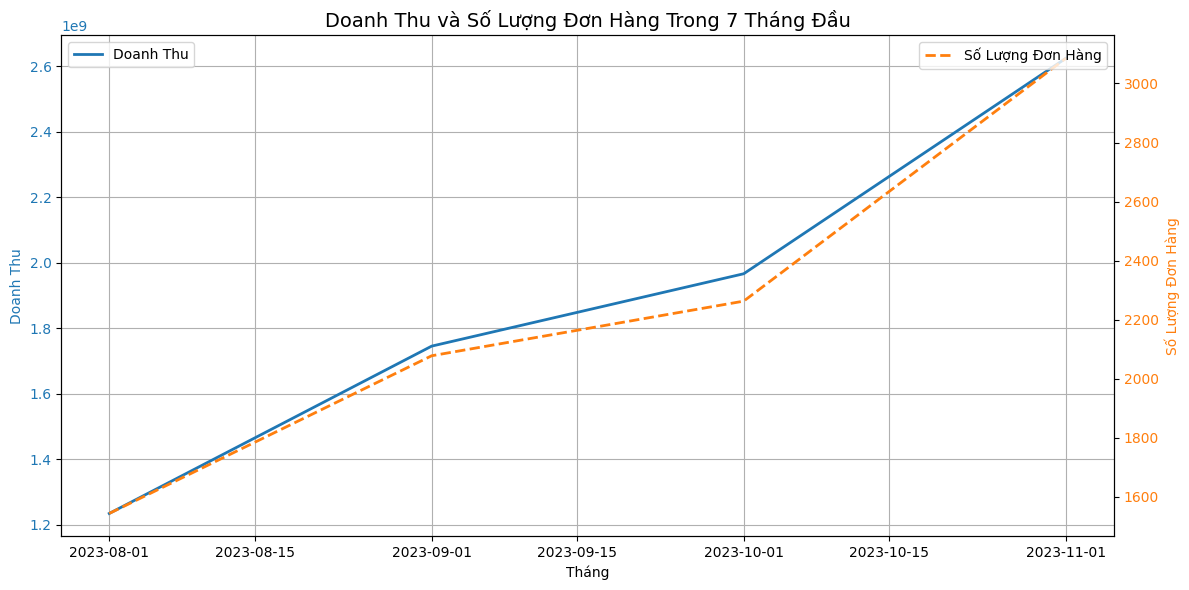

In [ ]:
import matplotlib.pyplot as plt

# Tạo cột 'year_month' từ 'Ngay_mua_hang'
df_8['year_month'] = df_8['Ngay_mua_hang'].dt.to_period('M')

# Tính tổng doanh thu theo tháng
grouped_revenue = df_8.groupby('year_month')['Doanh_thu'].sum().reset_index()

# Tính số lượng đơn hàng theo tháng (không trùng 'Ma_hoa_don')
grouped_orders = df_8.groupby('year_month')['Ma_hoa_don'].nunique().reset_index()

# Chuyển cột 'year_month' thành dạng timestamp để dễ vẽ
grouped_revenue['year_month'] = grouped_revenue['year_month'].dt.to_timestamp()
grouped_orders['year_month'] = grouped_orders['year_month'].dt.to_timestamp()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ doanh thu (Doanh thu theo tháng)
color = 'tab:blue'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh Thu', color=color)
ax1.plot(grouped_revenue['year_month'], grouped_revenue['Doanh_thu'], label='Doanh Thu', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid()

# Vẽ biểu đồ số lượng đơn hàng trên trục Y thứ hai
ax2 = ax1.twinx()  # Khởi tạo trục Y thứ hai
color = 'tab:orange'
ax2.set_ylabel('Số Lượng Đơn Hàng', color=color)
ax2.plot(grouped_orders['year_month'], grouped_orders['Ma_hoa_don'], label='Số Lượng Đơn Hàng', color=color, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Thêm tiêu đề và căn chỉnh layout
plt.title('Doanh Thu và Số Lượng Đơn Hàng Trong 7 Tháng Đầu', fontsize=14)
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Comments**:
- In the following months, revenue and number of orders increased strongly and maintained that growth from August to the end of the year.

# **Tạo 2 hàm để trình bày biểu đồ trực quan**

In [ ]:
def topofdoanhthu(df1, df2, number, column, title):
    top_5_dia_chi_8 = df1.groupby(column)['Doanh_thu'].sum().nlargest(number)
    top_5_dia_chi_17 = df2.groupby(column)['Doanh_thu'].sum().nlargest(number)

    # Vẽ biểu đồ
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Bar chart cho Dia_Chi
    top_5_dia_chi_17.plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'Top {number} {title} Nhieu Doanh Thu Trong 7 Thang Đau')
    axes[0].set_xlabel(title)
    axes[0].set_ylabel('Doanh Thu')

    # Bar chart cho Ma_SP
    top_5_dia_chi_8.plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Top {number} {title} Nhieu Doanh Thu Tu Thang 8 Den Cuoi Nam')
    axes[1].set_xlabel(title)
    axes[1].set_ylabel('Doanh Thu')

    # Giảm khoảng cách giữa các biểu đồ
    plt.subplots_adjust(wspace=0.3)  # Điều chỉnh khoảng cách giữa các cột

    # Tối ưu hóa hiển thị
    plt.tight_layout()
    plt.show()


In [ ]:
def botofdoanhthu(df1, df2, number, column, title):
    top_5_dia_chi_8 = df1.groupby(column)['Doanh_thu'].sum().nsmallest(number)
    top_5_dia_chi_17 = df2.groupby(column)['Doanh_thu'].sum().nsmallest(number)

    # Vẽ biểu đồ
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Bar chart cho Dia_Chi
    top_5_dia_chi_17.plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'Top {number} {title} Thap Doanh Thu Trong 7 Thang Đau')
    axes[0].set_xlabel(title)
    axes[0].set_ylabel('Doanh Thu')

    # Bar chart cho Ma_SP
    top_5_dia_chi_8.plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Top {number} {title} Thap Doanh Thu Tu Thang 8 Den Cuoi Nam')
    axes[1].set_xlabel(title)
    axes[1].set_ylabel('Doanh Thu')

    # Giảm khoảng cách giữa các biểu đồ
    plt.subplots_adjust(wspace=0.3)  # Điều chỉnh khoảng cách giữa các cột

    # Tối ưu hóa hiển thị
    plt.tight_layout()
    plt.show()


# **Address Analystics**

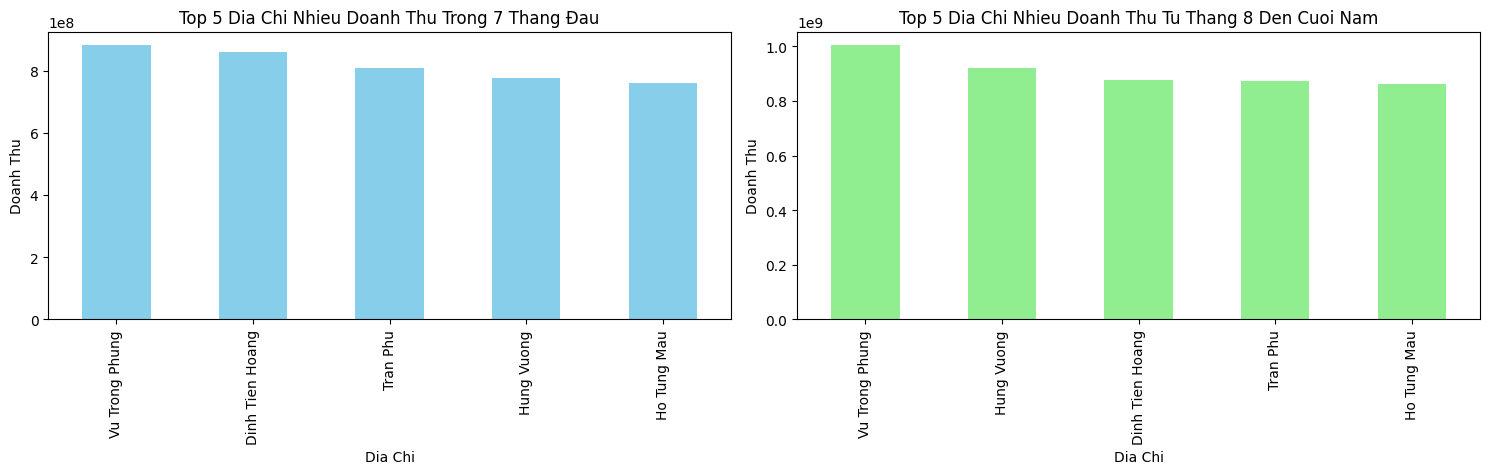

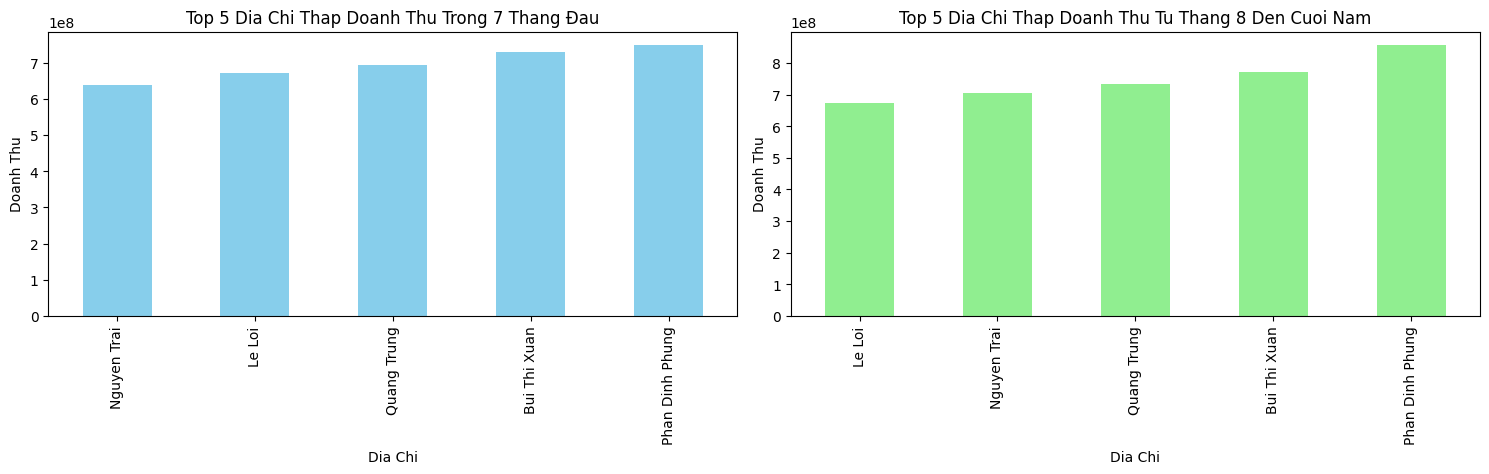

In [ ]:
topofdoanhthu(df_17,df_8,5,'Dia_chi',"Dia Chi")
botofdoanhthu(df_17,df_8,5,'Dia_chi',"Dia Chi")


**Comments:**
***During the period from January to the end of the year, the positions of the locations remained unchanged according to revenue***
- Store locations that businesses should focus on further developing: Vu Trong Phung, Dinh Tien Hoang, Tran Phu, Hung Vuong, Ho Tung Mau
- Store locations that businesses should consider and improve: Nguyen Trai, Le Loi, Quang Trung, Bui Thi Xuan, Phan Dinh Phung

# **Product Analystics**


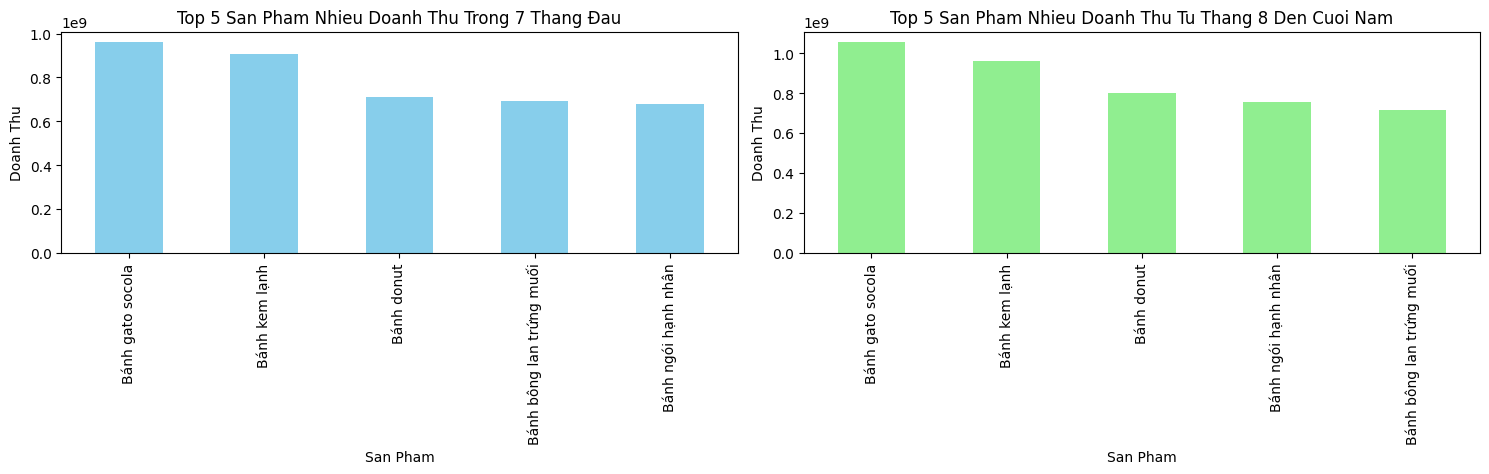

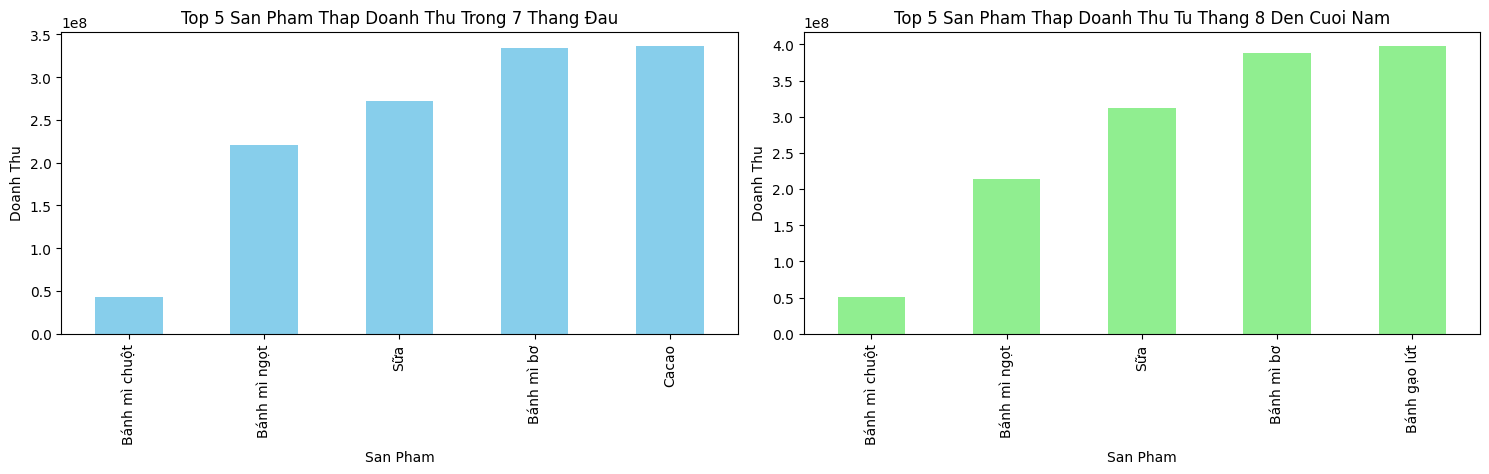

In [ ]:
topofdoanhthu(df_17,df_8,5,'Ten_SP',"San Pham")
botofdoanhthu(df_17,df_8,5,'Ten_SP',"San Pham")

**Comments:**
***The best-selling products of the store in 1 year are always unchanged, only the positions are changed***
- Products that businesses should produce and display more: Chocolate cake, Ice cream cake, Donut cake, Salted egg sponge cake, Almond tile cake
***But there are changes in the products that do not sell well**
- Products that businesses should consider: Mouse bread, Sweet bread, Milk, butter bread but there are 2 products, Cacao, which are quite popular in the first 7 months, but later the popularity is changed by Brown rice cake, so Cacao and Brown rice cake businesses should consider carefully and try to improve it.

# **Day of week Analystics**

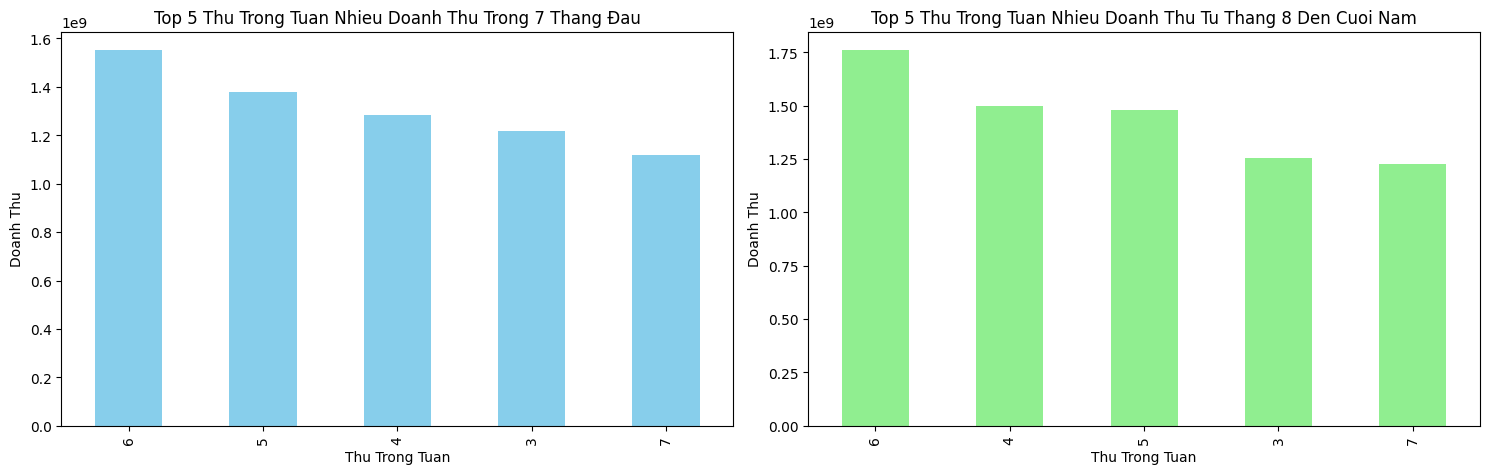

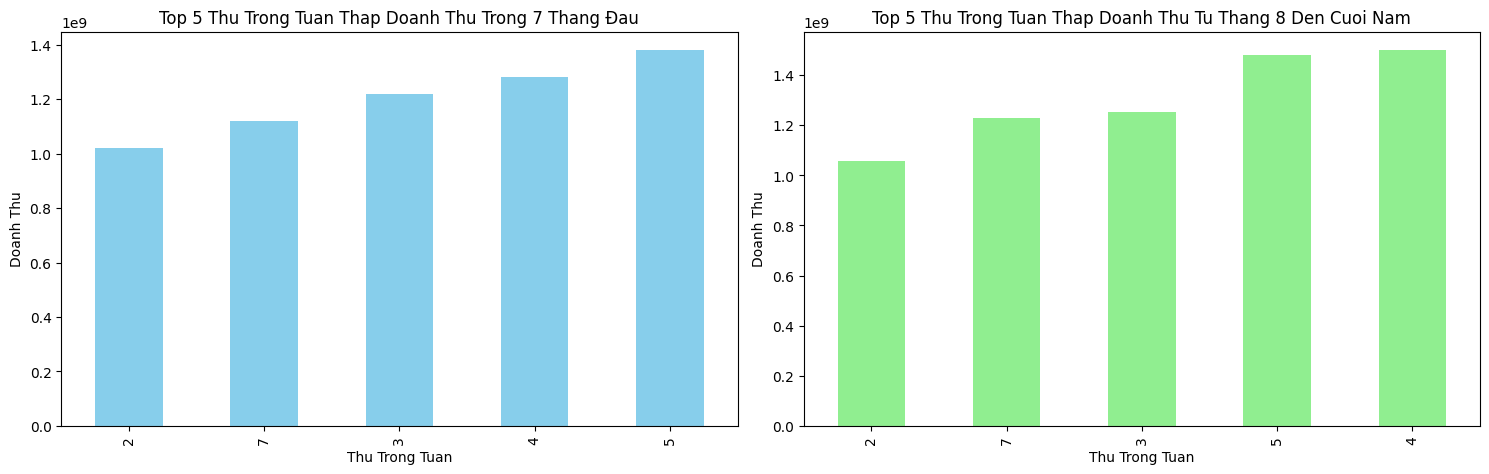

In [ ]:
topofdoanhthu(df_17,df_8,5,'thu_trong_tuan',"Thu Trong Tuan")
botofdoanhthu(df_17,df_8,5,'thu_trong_tuan',"Thu Trong Tuan")

**Comments:**
***Comparison of revenue growth by day of the week in the first 7 months and the following months:***
- The first and last days of the week have very few purchases and revenue
- The middle of the week, working days of office workers and students are very popular with cakes, so revenue is always higher than other days

# **Age Analystics**

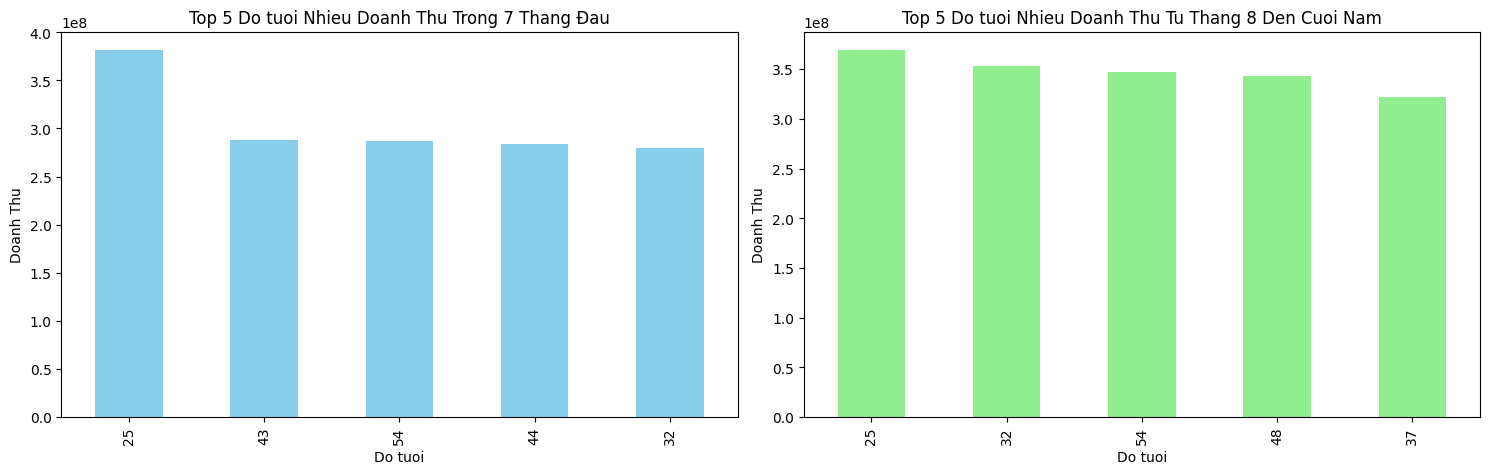

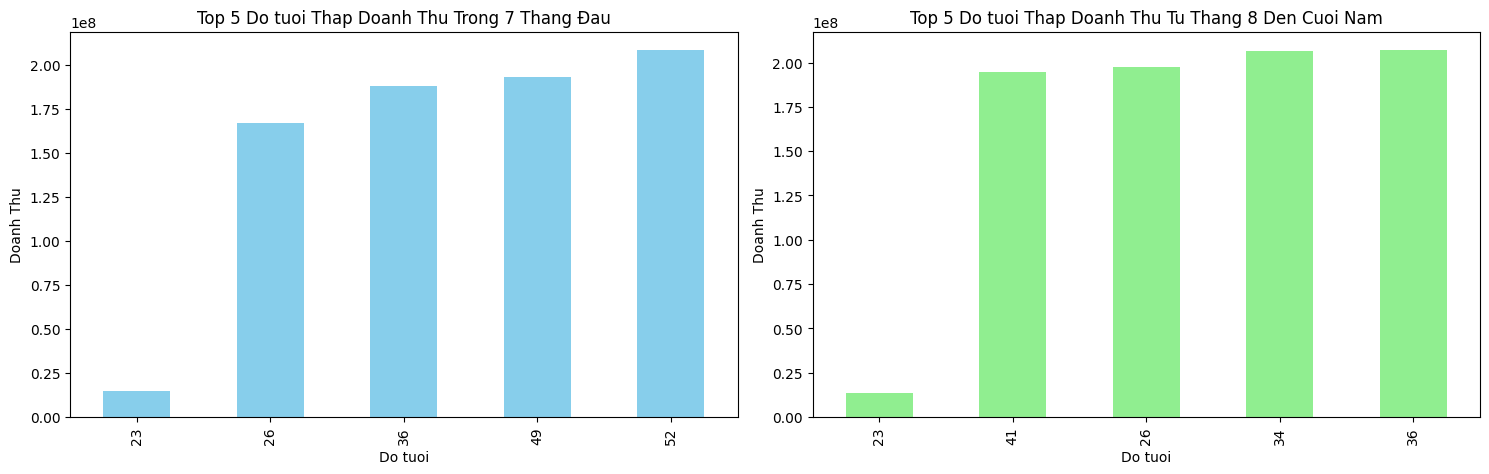

In [ ]:
topofdoanhthu(df_17,df_8,5,'age',"Do tuoi")
botofdoanhthu(df_17,df_8,5,'age',"Do tuoi")

**Comments:**
***The majority of the company's customers are from 25 to nearly 60 years old***
- The age of the customers is concentrated from 25 years old and up, the majority of the company's customers have stable jobs and some are married

# **Hour Analystics**

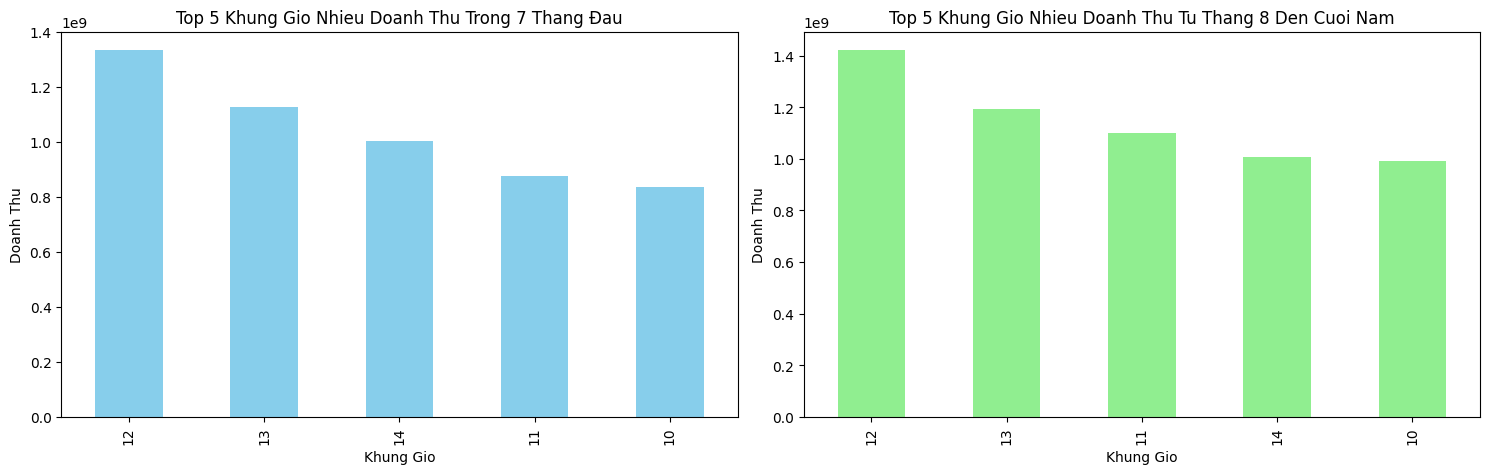

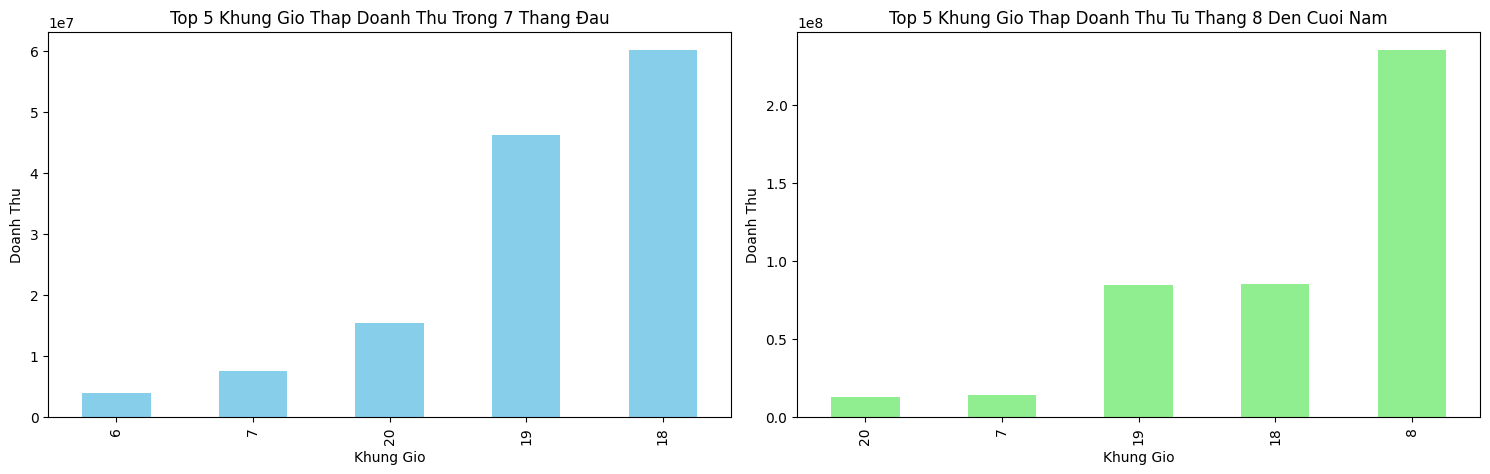

In [ ]:
topofdoanhthu(df_17,df_8,5,'hour',"Khung Gio")
botofdoanhthu(df_17,df_8,5,'hour',"Khung Gio")

**Comments:**
***About the time frame for purchasing products of businesses, customers buy products from businesses between 10am and 2pm***
- Customers buy products from businesses at 10am-2pm more than other time frames

# **Day Analystics**

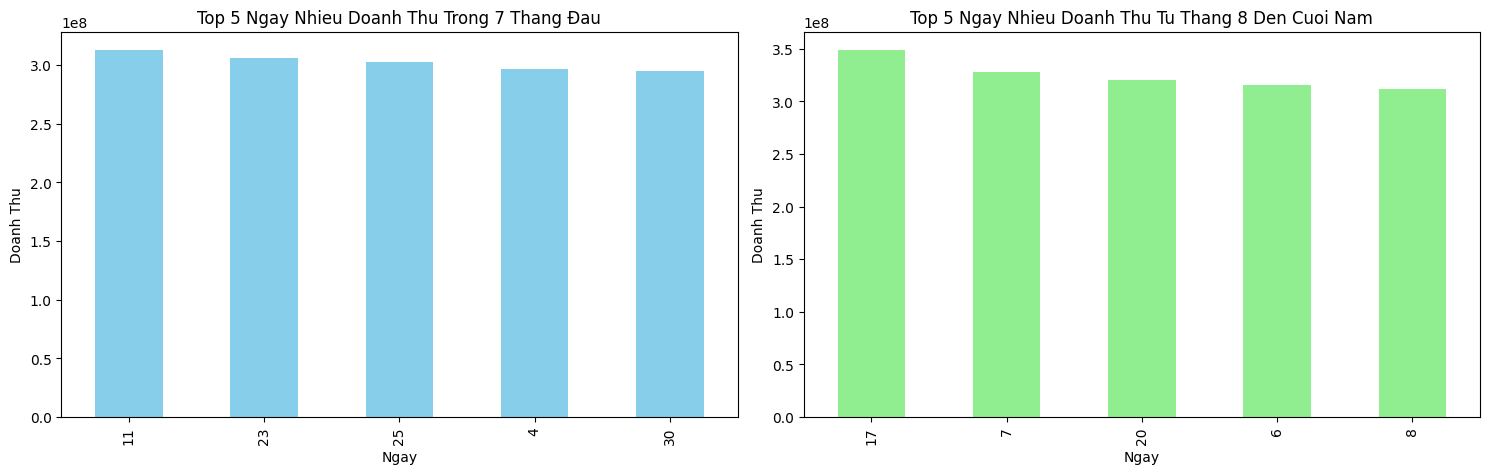

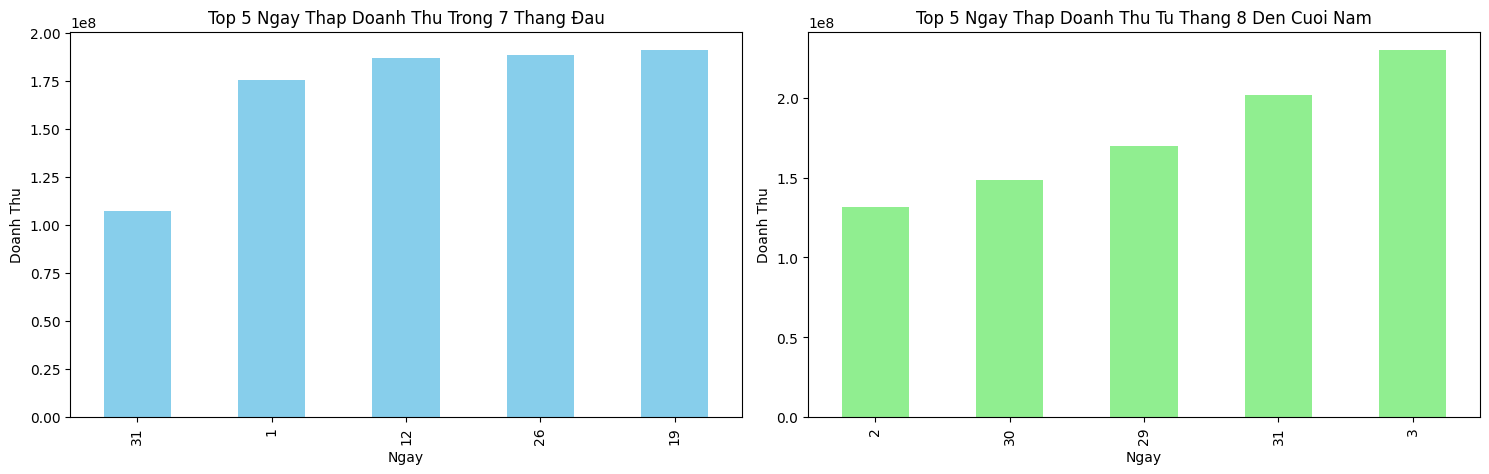

In [ ]:
topofdoanhthu(df_17,df_8,5,'day',"Ngay")
botofdoanhthu(df_17,df_8,5,'day',"Ngay")

**Comments:**
***About the days when customers buy products***
- In the first 7 months of the year, customers usually buy products on the first half of the month and later
- In the remaining months, customers usually buy products on the first 10 days and the last 10 days of the month

In [ ]:
data.to_csv('/content/drive/MyDrive/Duan_banhmy/Data_banhmy.csv', index=False)